### This notebook will investigate the long-term average ocean properties observed in the global ocean using the World Ocean Atlas 18 gridded dataset ([Boyer et al., 2018](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.nodc:NCEI-WOA18)) hosted by NOAA's National Centers for Environmental Information (NCEI) and based on data in the World Ocean Database (WOD).

### From www.ncei.noaa.gov: _The World Ocean Atlas (WOA) is a collection of gridded, quality controlled temperature, salinity, oxygen, phosphate, silicate, and nitrate means on standard depth levels based on profile data from the World Ocean Database (WOD). It can be used to create boundary and/or initial conditions for a variety of ocean models, verify numerical simulations of the ocean, and corroborate satellite data._

### The WOA is published semi-regulary since 1994 and is based off of the ground breaking Climatological Atlas of the World Ocean published by NOAA scientist Sydney Levitus in 1982 (while at NOAA's Geophysical Fluid Dynamics Laboratory). __The WOA is one of the most widely used datasets in oceanography and climate science__.

![](https://books.google.com/books/content?id=_x0IAQAAIAAJ&pg=PR1&img=1&zoom=3&hl=en&sig=ACfU3U1UpmEg019E4PriRYiyjSzvlagEDQ&w=1025)

### The gridded WOA dataset is used to:
* #### Development and evaluation of ocean models.
* #### Development and evaluation of fully coupled climate models.
* #### Provides the __initial conditions__ for climate model simulations.
* #### Verification of ocean surface properties against satellite observations.
* #### Planning oceanographic expeditions and observational campaigns.
* #### Assessing physical and biogeochemical properties in the ocean and their change.

#### Authors: Dr. Rebecca L. Beadling. For any questions regarding the contents of this notebook please contact rebecca.beadling@temple.edu.

## Read in the data

In [1]:
import xarray as xr
import cmocean 
import matplotlib.pyplot as plt
import cftime

In [2]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6 

plt.style.use("dark_background") ### sets dark background for all plots

In [3]:
woa18_data = xr.open_zarr('/home/ees_student/Miranda_Unit6/data/woa18/woa18_full_decadal_ave_fields/')

In [4]:
woa18_data

<xarray.Dataset>
Dimensions:   (depth: 102, lat: 180, lon: 360)
Coordinates:
  * depth     (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat       (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon       (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    nitrate   (depth, lat, lon) float32 dask.array<chunksize=(26, 45, 180), meta=np.ndarray>
    oxygen    (depth, lat, lon) float32 dask.array<chunksize=(26, 45, 180), meta=np.ndarray>
    salinity  (depth, lat, lon) float32 dask.array<chunksize=(26, 45, 180), meta=np.ndarray>
    temp      (depth, lat, lon) float32 dask.array<chunksize=(26, 45, 180), meta=np.ndarray>

#### <span style="color:red"> What variables are contained in our `woa18_data` dataset?

#### Nitrate, oxygen, salinity & temperature

#### <span style="color:red"> Write code in the cell below that extract each DataArray from the `woa18_data` dataset and assign it to variables corresponding to the DataArray name following the example for temperature below.

In [5]:
temp = woa18_data.temp
oxy = woa18_data.oxygen
sal = woa18_data.salinity
nit = woa18_data.nitrate




#### Investigating our `temp` array shows that it has the dimensions `depth`, `lat`, `lon`. Our DataArrays do NOT have a time dimension becuase they are the long-term average of each property (spanning all available time periods of observations). Our `lat`, `lon` dimensions indicate this data on a global 1-degree grid (360 grid cells in longitude x 180 grid cells in latitude), and on 102 depth levels that span the surface to 5500 m.

In [6]:
temp

<xarray.DataArray 'temp' (depth: 102, lat: 180, lon: 360)>
dask.array<open_dataset-temp, shape=(102, 180, 360), dtype=float32, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Attributes:
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    coordinates:    time lat lon depth
    grid_mapping:   crs
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    standard_name:  sea_water_temperature
    units:          degrees_celsius

#### Notice that our `depth` coordinate values span 0 to 5500, with 0 being at the ocean surface. <span style="color:red"> In the cell below, the code produce a simple global map of surface temperature.

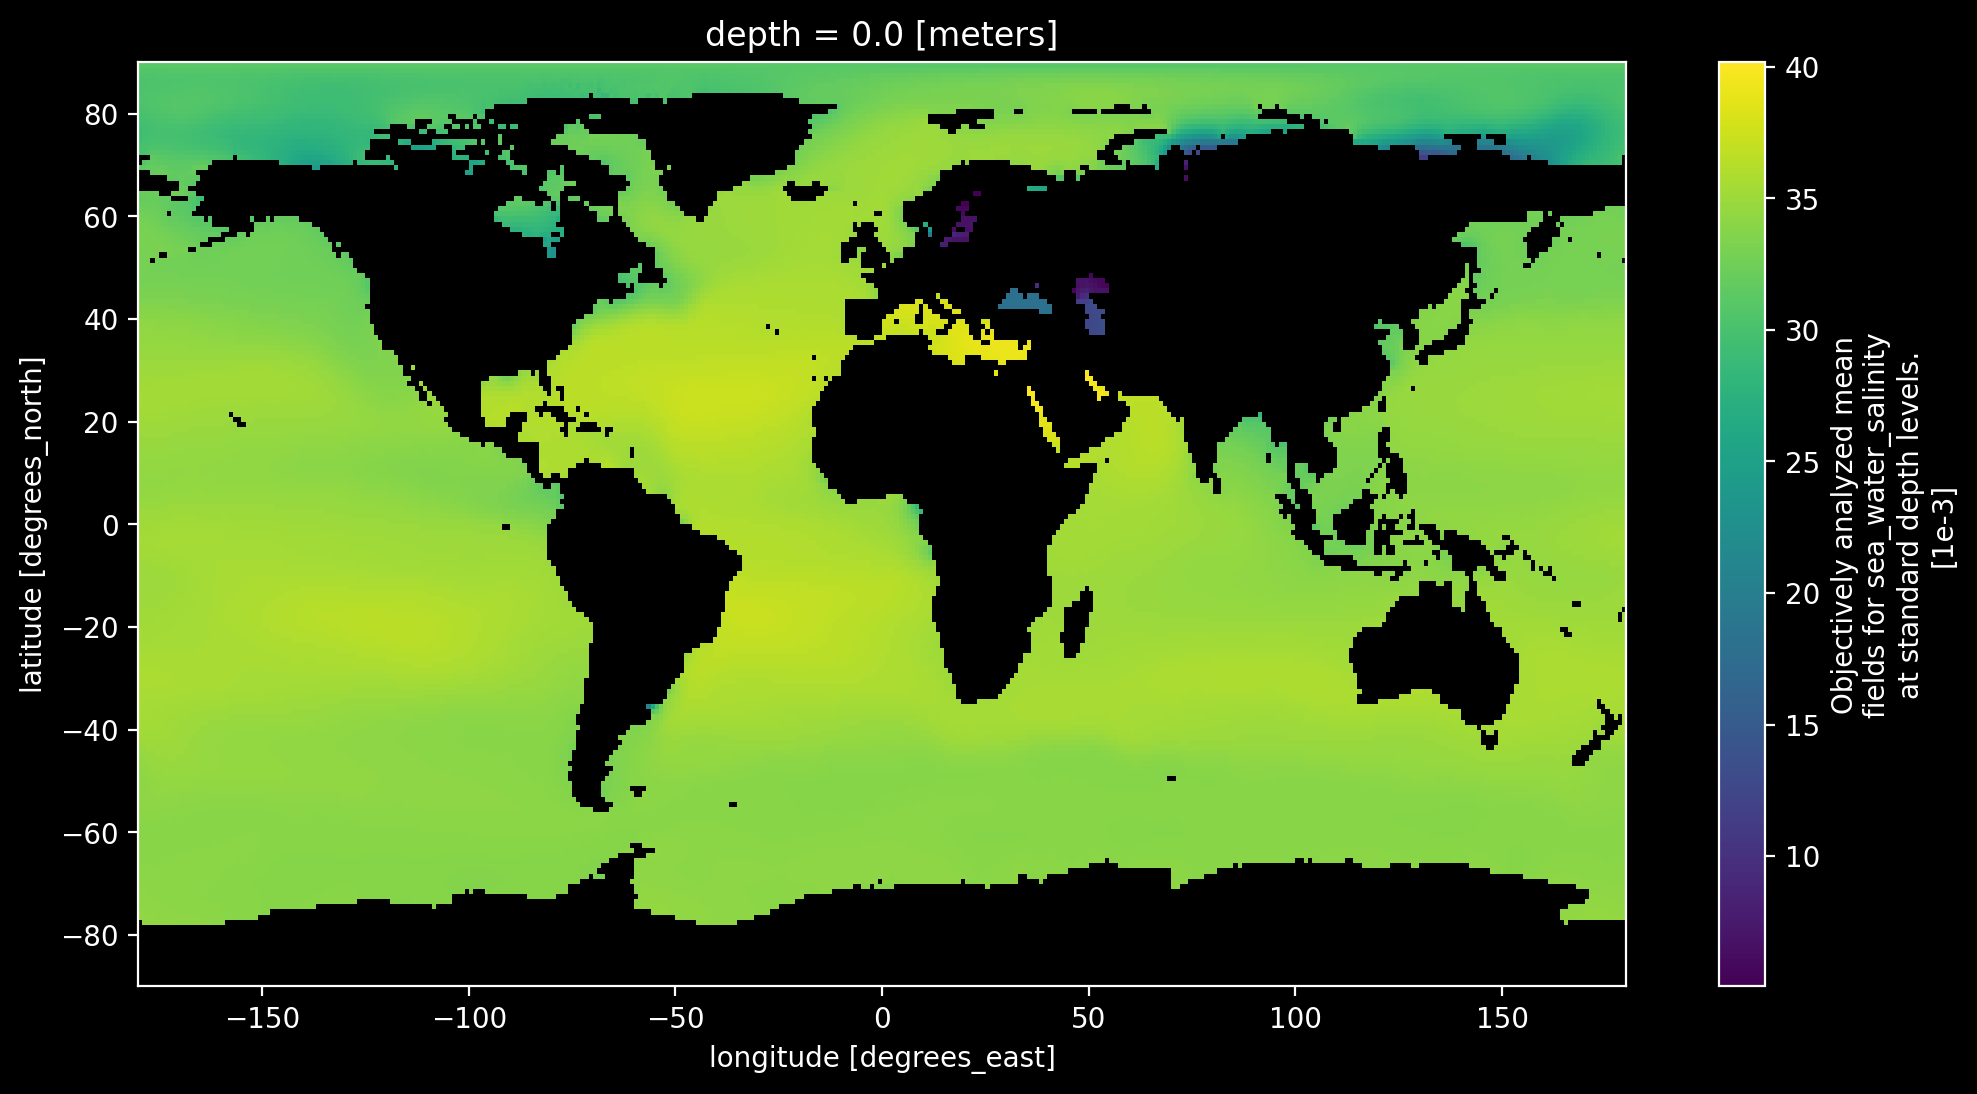

In [7]:
sal.isel(depth=0).plot()

Text(0.5, 1.0, 'Surface Salinity of Global Oceans')

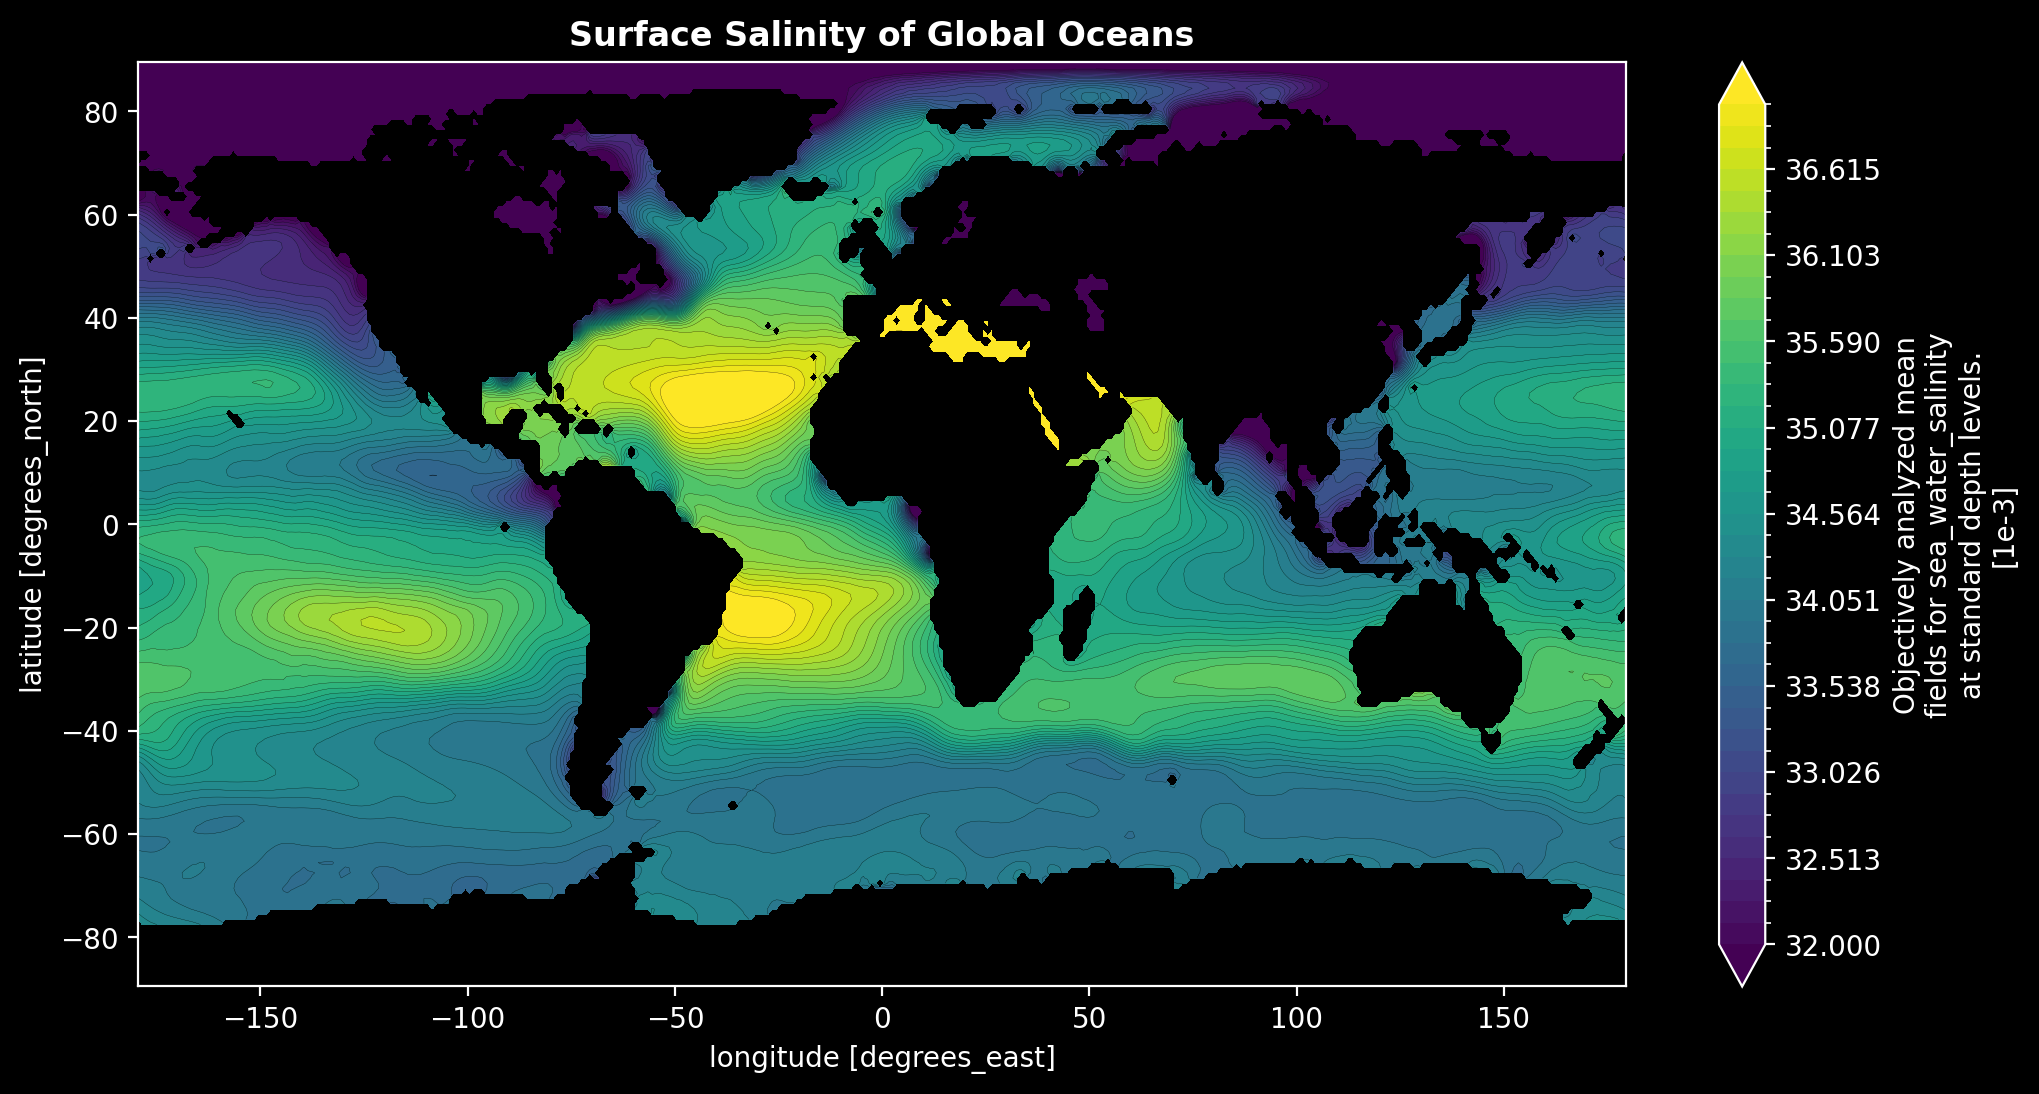

In [8]:
sal.isel(depth=0).plot.contourf(vmin=32,
                       vmax=37, levels=40)
sal.isel(depth=0).plot.contour(vmin=32,
                       vmax=37,colors='black',linewidths=0.1,
                       levels=40)
plt.title("Surface Salinity of Global Oceans", fontweight='bold')

#### After making an simple plot, we can look at your plot in detail and customize the arguments within our `array.plot()` method to pick appropriate `vmin` and `vmax` values for the colorbar. Since this is ocean temperature here we use the `cmocean.cm.thermal` colormap. We also add `.contourf` to our `.plot` method to specificy that we want to make a __filled contour__ map. This will make our data look smoother as it interpolates between points.
    
#### We add another argument of `levels=integer_value` and set the integer value to indicate the number of levels we want your colorbar to be broken up into. How does this change your ability to evaluate the data?

Text(0.5, 1.0, 'Sea Surface Temperature of Global Oceans')

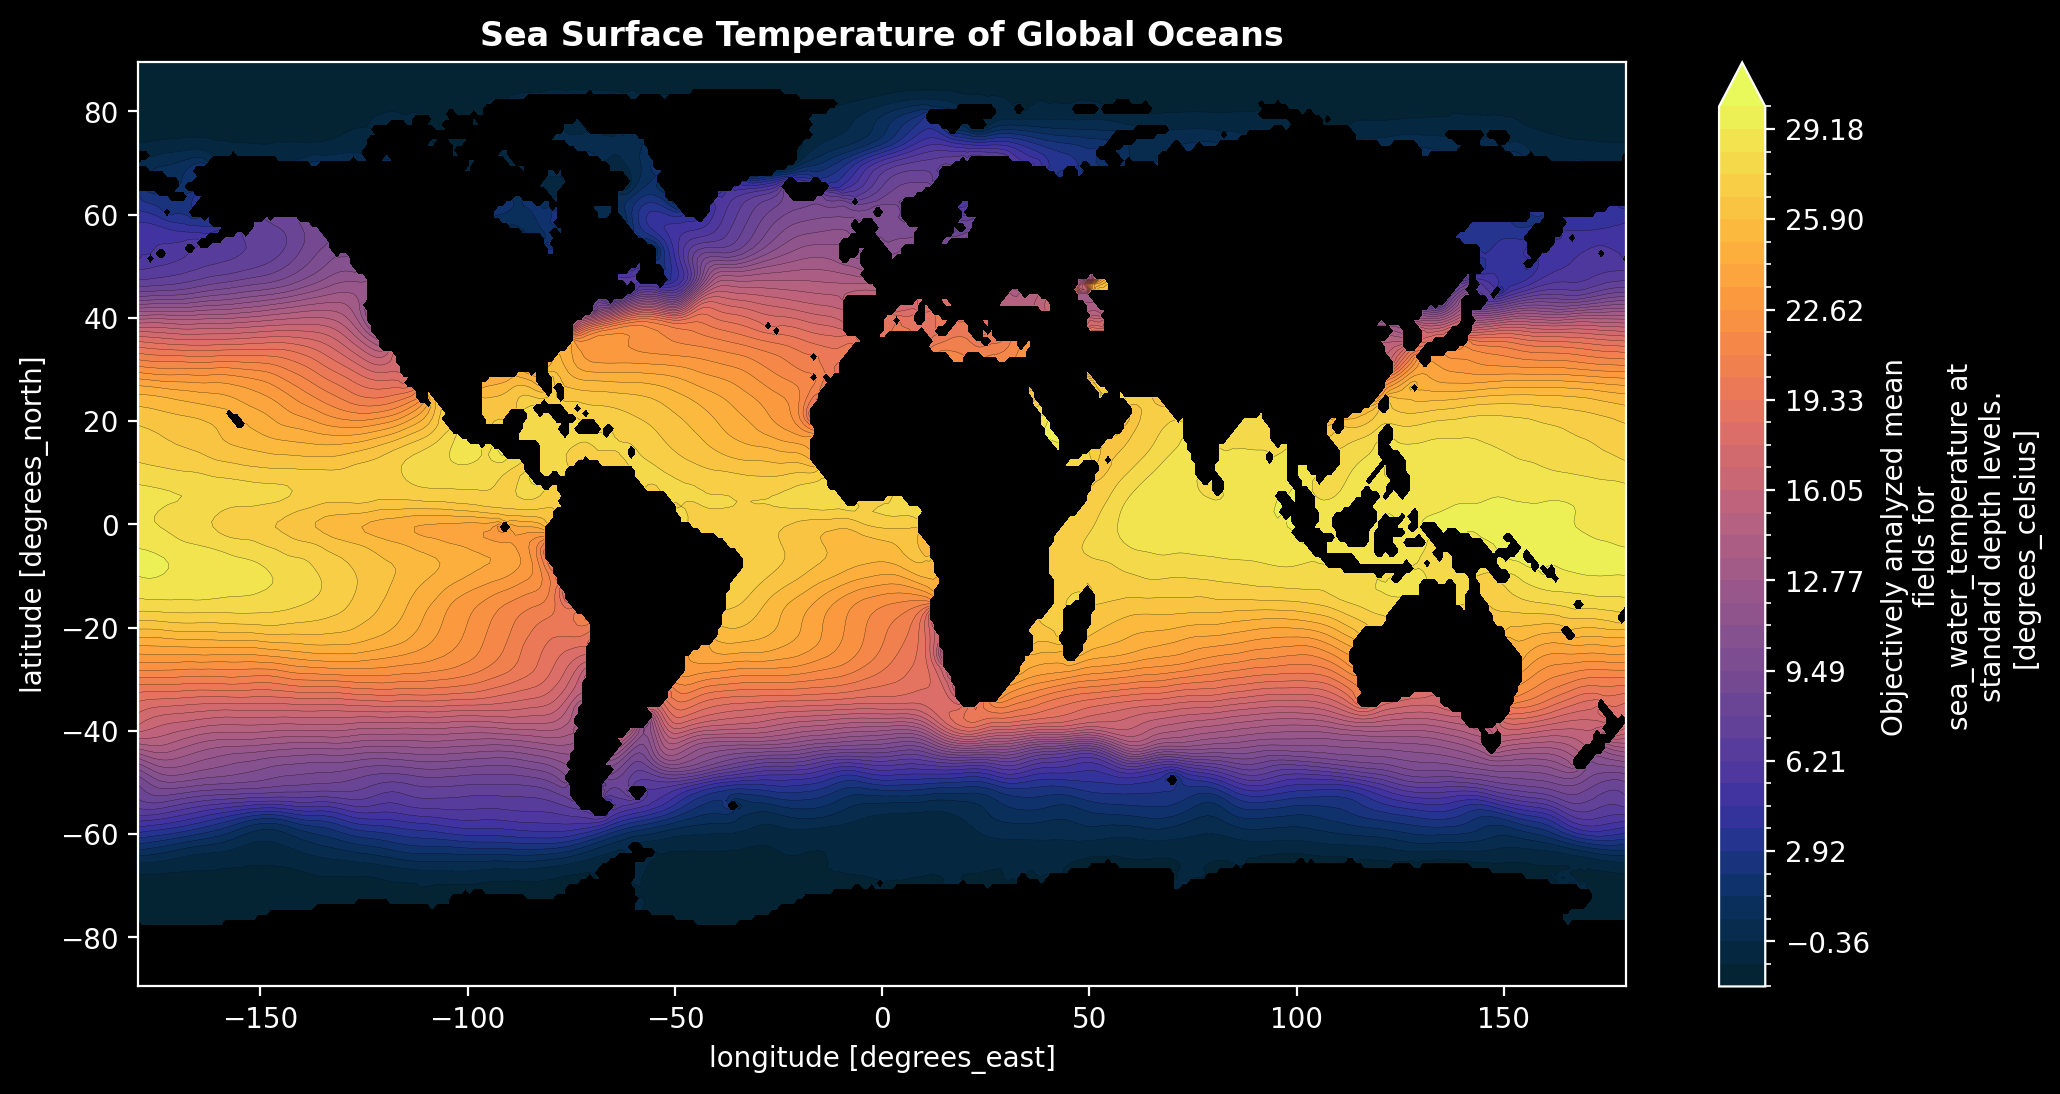

In [9]:
temp.sel(depth=0).plot.contourf(vmin=-2,                  
                       vmax=30,cmap=cmocean.cm.thermal,
                       levels=40)

#### Add black contours over top of our filled contour plot, by specifying .plot.contour():
temp.sel(depth=0).plot.contour(vmin=-2,
                       vmax=30,colors='black',linewidths=0.1,
                       levels=40)
plt.title("Sea Surface Temperature of Global Oceans", fontweight='bold')

#### Gives the better resolutiuon over the range of values.

#### <span style="color:red"> Repeat the excercise above in the cells below, producing surface maps of salinity, oxygen, and nitrate.

In [10]:
oxy

<xarray.DataArray 'oxygen' (depth: 102, lat: 180, lon: 360)>
dask.array<open_dataset-oxygen, shape=(102, 180, 360), dtype=float32, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Attributes:
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    coordinates:    time lat lon depth
    grid_mapping:   crs
    long_name:      Objectively analyzed mean fields for mole_concentration_o...
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          micromoles_per_kilogram

In [ ]:
oxy.sel(depth=0).plot(cmap=cmocean.cm.amp)

In [ ]:
oxy.sel(depth=0).plot.contourf(vmin=180,                  
                       vmax=400,cmap=cmocean.cm.amp,
                       levels=20)
oxy.sel(depth=0).plot.contour(vmin=180,
                       vmax=400,colors='black',linewidths=0.1,
                       levels=20)
plt.title("Dissolved Oxygen at the Ocean Surface", fontweight='bold')

In [ ]:
nit

In [ ]:
nit.sel(depth=0).plot(cmap=cmocean.cm.algae)

In [ ]:
nit.sel(depth=0).plot.contourf(vmin=0,                  
                       vmax=33,cmap=cmocean.cm.algae,
                       levels=22)


nit.sel(depth=0).plot.contour(vmin=0,
                       vmax=33,colors='black',linewidths=0.1,
                       levels=22)
plt.title("Dissolved Nitrates Across the Global Oceanic Surface", fontweight='bold')

#### <span style="color:red"> Looking at your surface figures of observed temperature, salinity, oxygen, and nitrate. Discuss any patterns you observe in the cells below:

#### Generally, the warmer the surface waters are, the higher the salinity and lower dissolved oxygen. The highest concnetration of dissolved oxygen is found in the North Pole, where it can also bee seen having the lowest average SST. Nitrates do not seem to be constrained by temperatures as the other 2 parameters. 

### Now lets make a cross-section of temperature, salinity, oxygen, and nitrate through the center of the Atlantic along the A16 repeat hydrographic secton, which is at ~24 degrees West (coordinate of -24 in our arrays).
![](http://sam.ucsd.edu/whp_atlas/atlantic/images/atlantic_click_map.jpg)

In [ ]:
A16_temp = temp.sel(lon=-24,method='nearest')

#### Plot of A16_temp

In [ ]:
####(walk through this step by step)

In [ ]:
A16_temp.sel(lat=slice(-80,75)).plot.contourf(yincrease=False,cmap=cmocean.cm.thermal)

In [ ]:
A16_temp.sel(lat=slice(-80,75)).plot.contourf(yincrease=False,
             vmin=-10,
             vmax=30,levels=40,cmap=cmocean.cm.thermal)
A16_temp.sel(lat=slice(-80,75)).plot.contour(yincrease=False,
             vmin=-10,
             vmax=30,
             levels=40,colors='white',linewidths=0.1)
plt.title("Temperature Along the A16 Transect", fontweight='bold')

#### <span style="color:red"> In the cells below, produce plots using `.plot.contourf()` and `.plot.contour()` that display the cross-sections of oxygen, nitrate, and salinity along the A16 line:

In [ ]:
A16_sal = sal.sel(lon=-24,method='nearest')
A16_sal.sel(lat=slice(-80,75)).plot.contourf(yincrease=False,cmap=cmocean.cm.haline)

In [ ]:
A16_sal = sal.sel(lon=-24,method='nearest')
A16_sal.sel(lat=slice(-80,75)).plot.contourf(yincrease=False,
             vmin=33,
             vmax=37,levels=40,cmap=cmocean.cm.haline)
A16_sal.sel(lat=slice(-80,75)).plot.contour(yincrease=False,
             vmin=33,
             vmax=37,
             levels=40,colors='black',linewidths=0.1)
plt.title("Salinity Along the A16 Transect", fontweight='bold')

In [ ]:
A16_oxy = oxy.sel(lon=-24,method='nearest')
A16_oxy.sel(lat=slice(-80,75)).plot.contourf(yincrease=False,cmap=cmocean.cm.amp)

In [ ]:
A16_oxy = oxy.sel(lon=-24,method='nearest')
A16_oxy.sel(lat=slice(-80,75)).plot.contourf(yincrease=False,
             vmin=50,
             vmax=400,levels=25,cmap=cmocean.cm.amp)
A16_oxy.sel(lat=slice(-80,75)).plot.contour(yincrease=False,
             vmin=50,
             vmax=400,
             levels=25,colors='black',linewidths=0.1)
plt.title("Dissolved Oxygen Along the A16 Transect", fontweight='bold')

In [ ]:
A16_nit = nit.sel(lon=-24,method='nearest')
A16_nit.sel(lat=slice(-80,75)).plot.contourf(yincrease=False,cmap=cmocean.cm.algae)

In [ ]:
A16_nit = nit.sel(lon=-24,method='nearest')
A16_temp.sel(lat=slice(-80,75)).plot.contourf(yincrease=False,
             vmin=0,
             vmax=30,levels=30,cmap=cmocean.cm.algae)
A16_temp.sel(lat=slice(-80,75)).plot.contour(yincrease=False,
             vmin=0,
             vmax=30,
             levels=30,colors='black',linewidths=0.1)
plt.title("Dissolved Nitrates Along the A16 Transect", fontweight='bold')

#### <span style="color:red"> In the cells below, repeat the excercise but for ~26 N:

## <span style="color:green"> Ignore the profiles titled "WRONG". I got confused between lat and long. Scroll to the end for the correct lat 26 transects code.

In [ ]:
N26_temp = nit.sel(lon=-26,method='nearest')
N26_temp.sel(lat=slice(-80,75)).plot.contourf(yincrease=False,cmap=cmocean.cm.thermal)

In [ ]:
N26_temp = nit.sel(lon=-26,method='nearest')
N26_temp.sel(lat=slice(-80,75)).plot.contourf(yincrease=False,
             vmin=0,
             vmax=40,levels=20,cmap=cmocean.cm.thermal)
N26_temp.sel(lat=slice(-80,75)).plot.contour(yincrease=False,
             vmin=0,
             vmax=40,
             levels=20,colors='black',linewidths=0.1)
plt.title("WRONG", fontweight='bold')

In [ ]:
N26_sal = sal.sel(lon=-26,method='nearest')
N26_sal.sel(lat=slice(-80,75)).plot.contourf(yincrease=False,cmap=cmocean.cm.haline)

In [ ]:
N26_sal = sal.sel(lon=-26,method='nearest')
N26_sal.sel(lat=slice(-80,75)).plot.contourf(yincrease=False,
             vmin=33,
             vmax=37,levels=40,cmap=cmocean.cm.haline)
N26_sal.sel(lat=slice(-80,75)).plot.contour(yincrease=False,
             vmin=33,
             vmax=37,
             levels=40,colors='black',linewidths=0.1)
plt.title("WRONG", fontweight='bold')

In [ ]:
N26_oxy = oxy.sel(lon=-26,method='nearest')
N26_oxy.sel(lat=slice(-80,75)).plot.contourf(yincrease=False,cmap=cmocean.cm.amp)

In [ ]:
N26_oxy = oxy.sel(lon=-26,method='nearest')
N26_oxy.sel(lat=slice(-80,75)).plot.contourf(yincrease=False,
             vmin=0,
             vmax=350,levels=25,cmap=cmocean.cm.amp)
N26_oxy.sel(lat=slice(-80,75)).plot.contour(yincrease=False,
             vmin=0,
             vmax=350,
             levels=25,colors='black',linewidths=0.1)
plt.title("WRONG", fontweight='bold')

In [ ]:
N26_nit = nit.sel(lon=-26,method='nearest')
N26_nit.sel(lat=slice(-80,75)).plot.contourf(yincrease=False,cmap=cmocean.cm.algae)

In [ ]:
N26_nit = nit.sel(lon=-26,method='nearest')
N26_nit.sel(lat=slice(-80,75)).plot.contourf(yincrease=False,
             vmin=0,
             vmax=40,levels=20,cmap=cmocean.cm.algae)
N26_nit.sel(lat=slice(-80,75)).plot.contour(yincrease=False,
             vmin=0,
             vmax=40,
             levels=20,colors='black',linewidths=0.1)
plt.title("WRONG", fontweight='bold')

#### <span style="color:red"> Repeat your analysis that we did for surface fields, but at 1000 m depth. Use the SAME vmin and vmax that you used for the surface analysis, so that you can make a one-to-one comparison of how the magnitude of properties are different.

In [ ]:
temp.sel(depth=1000).plot.contourf(cmap=cmocean.cm.thermal)

In [ ]:
temp.sel(depth=1000).plot.contourf(vmin=-2,                  
                       vmax=30,cmap=cmocean.cm.thermal,
                       levels=40)


temp.sel(depth=1000).plot.contour(vmin=-2,
                       vmax=30,colors='black',linewidths=0.1,
                       levels=40)
plt.title("Global Temperature at 1000m Deep in Oceanic Basins", fontweight='bold')

In [ ]:
sal.sel(depth=1000).plot.contourf(vmin=32,                  
                       vmax=37,cmap=cmocean.cm.haline,
                       levels=40)


sal.sel(depth=1000).plot.contour(vmin=32,
                       vmax=37,colors='black',linewidths=0.1,
                       levels=40)
plt.title("Global Salinity at 1000m Deep in Oceanic Basins", fontweight='bold')

In [ ]:
oxy.sel(depth=1000).plot.contourf(vmin=180,                  
                       vmax=400,cmap=cmocean.cm.amp,
                       levels=20)


oxy.sel(depth=1000).plot.contour(vmin=180,
                       vmax=400,colors='black',linewidths=0.1,
                       levels=20)
plt.title("Global Dissolved Oxygen at 1000m Deep in Oceanic Basins", fontweight='bold')

In [ ]:
nit.sel(depth=1000).plot.contourf(vmin=0,                  
                       vmax=33,cmap=cmocean.cm.algae,
                       levels=22)


nit.sel(depth=1000).plot.contour(vmin=0,
                       vmax=33,colors='black',linewidths=0.1,
                       levels=22)
plt.title("Global Dissolved Nitrates at 1000m Deep in Oceanic Basins", fontweight='bold')

#### <span style="color:red"> Drag and drop all your figures into a PowerPoint and so that you can easily compare them against one another - what patterns do you observe on the spatial distribtions a) at the surface, b) in the interior ocean. Use arrows to draw any connections you observe between the surface and interior ocean.

## Answers submitted in the powerpoint. 

#### <span style="color:red"> In your PowerPoint put labels on your plots identifying the three "basins" you see in your 26 N cross-sections.

#### <span style="color:red"> Discuss how the subsurface properties differ between the North subtropical Atlantic and North subtropical Atlantic. Make statements like "the interior ocean in the Atlantic has ____ levels of nitrate relative to the Pacific ____".

#### <span style="color:red"> Based off of your brief intro to physical oceanography ... hypothesize why you might see some of these features ...

## Answers submitted in the powerpoint. 

### Push your final notebook with completed analysis and answers to the questions to GitHub and submit your PowerPoint with labeled basins and interior pathways via Canvas when you are done.

In [ ]:
lat_N26_temp = temp.sel(lat=26,method='nearest')
lat_N26_temp.sel(lon=slice(-180,180)).plot.contourf(yincrease=False,cmap=cmocean.cm.thermal)

In [ ]:
lat_N26_temp = temp.sel(lat=26,method='nearest')
lat_N26_temp.sel(lon=slice(-180,180)).plot.contourf(yincrease=False,vmin=0,
             vmax=30, levels=60, cmap=cmocean.cm.thermal)
lat_N26_temp.sel(lon=slice(-180,180)).plot.contour(yincrease=False,
             vmin=0,
             vmax=30,
             levels=60,colors='white',linewidths=0.1)
plt.title("Temperature Along the 26 N Parallel", fontweight='bold')

In [ ]:
lat_N26_sal = sal.sel(lat=26,method='nearest')
lat_N26_sal.sel(lon=slice(-180,180)).plot.contourf(yincrease=False,cmap=cmocean.cm.haline)

In [ ]:
lat_N26_sal = sal.sel(lat=26,method='nearest')
lat_N26_sal.sel(lon=slice(-180,180)).plot.contourf(yincrease=False, vmin=33,
             vmax=39,
             levels=40, cmap=cmocean.cm.haline)
lat_N26_sal.sel(lon=slice(-180,180)).plot.contour(yincrease=False,
             vmin=33,
             vmax=39,
             levels=40,colors='white',linewidths=0.1)
plt.title("Salinity Along the 26 N Parallel", fontweight='bold')

In [ ]:
lat_N26_oxy = oxy.sel(lat=26,method='nearest')
lat_N26_oxy.sel(lon=slice(-180,180)).plot.contourf(yincrease=False,cmap=cmocean.cm.amp)


In [ ]:
lat_N26_oxy = oxy.sel(lat=26,method='nearest')
lat_N26_oxy.sel(lon=slice(-180,180)).plot.contourf(yincrease=False, vmin=0,
             vmax=300,
             levels=50, cmap=cmocean.cm.amp)
lat_N26_oxy.sel(lon=slice(-180,180)).plot.contour(yincrease=False,
             vmin=0,
             vmax=300,
             levels=50,colors='black',linewidths=0.1)
plt.title("Dissolved Oxygen Along the 26 N Parallel", fontweight='bold')

In [ ]:
lat_N26_nit = nit.sel(lat=26,method='nearest')
lat_N26_nit.sel(lon=slice(-180,180)).plot.contourf(yincrease=False,cmap=cmocean.cm.algae)

In [ ]:
lat_N26_nit = nit.sel(lat=26,method='nearest')
lat_N26_nit.sel(lon=slice(-180,180)).plot.contourf(yincrease=False,vmin=0,
             vmax=48,
             levels=24,cmap=cmocean.cm.algae)
lat_N26_nit.sel(lon=slice(-180,180)).plot.contour(yincrease=False,
             vmin=0,
             vmax=48,
             levels=24,colors='black',linewidths=0.1)
plt.title("Dissolved Nitrates Along the 26 N Parallel", fontweight='bold')